In [1]:
import keras
import numpy as np
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Divide by 255 to Set the Values to 0-1

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the Images from 28x28 to 1-Dimensional Matrix

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Train the Nearest Class Centroid Model

In [5]:
from sklearn.neighbors import NearestCentroid
ncc = NearestCentroid(metric='euclidean')

ncc.fit(x_train, y_train)

NearestCentroid()

In [6]:
y_pred = ncc.predict(x_test)

# Evaluation of the NCC Model

In [7]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       980
           1       0.77      0.96      0.86      1135
           2       0.88      0.76      0.81      1032
           3       0.77      0.81      0.78      1010
           4       0.80      0.83      0.81       982
           5       0.75      0.69      0.72       892
           6       0.88      0.86      0.87       958
           7       0.91      0.83      0.87      1028
           8       0.79      0.74      0.76       974
           9       0.77      0.81      0.79      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [8]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion

array([[ 878,    0,    7,    2,    2,   58,   25,    1,    7,    0],
       [   0, 1092,   10,    3,    0,    7,    3,    0,   20,    0],
       [  19,   71,  781,   33,   31,    3,   23,   18,   50,    3],
       [   4,   24,   25,  814,    1,   49,    8,   15,   58,   12],
       [   1,   22,    2,    0,  811,    3,   16,    1,   10,  116],
       [  11,   63,    2,  118,   21,  612,   27,   10,   13,   15],
       [  18,   27,   22,    0,   31,   32,  827,    0,    1,    0],
       [   2,   59,   22,    1,   20,    2,    0,  856,   13,   53],
       [  14,   39,   11,   83,   12,   36,   13,   10,  718,   38],
       [  15,   22,    7,   10,   83,   12,    1,   27,   18,  814]],
      dtype=int64)

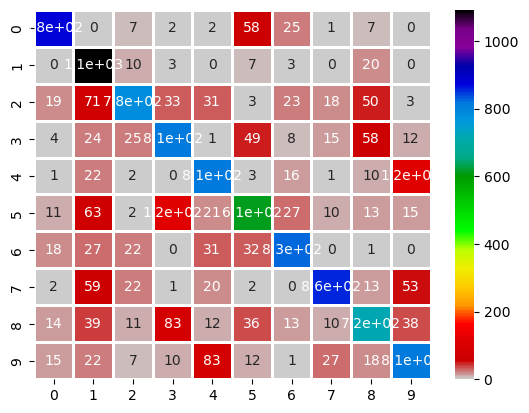

In [9]:
import seaborn as sns
s = sns.heatmap(confusion, annot=True,linewidths=2, cmap='nipy_spectral_r')

# One-Hot Encoding of the y Values

In [10]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [11]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Train the K-Nearest Neighbor Model for k=3

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
knn_3.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [14]:
y_pred = knn_3.predict(x_test)

C:\Users\nikos\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Evaluation of the Model for k=3

In [15]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 samples avg       0.97      0.97      0.97     10000



In [16]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   1, 1132,    2,    0,    0,    0,    0,    0,    0,    0],
       [  15,    7,  993,    2,    0,    0,    0,   13,    2,    0],
       [   4,    1,    4,  974,    1,   12,    1,    7,    3,    3],
       [   6,    4,    0,    0,  947,    0,    4,    2,    0,   19],
       [  10,    0,    0,    9,    2,  858,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   4,   18,    4,    0,    1,    0,    0,  991,    0,   10],
       [  21,    0,    3,   11,    4,   10,    3,    4,  914,    4],
       [   9,    4,    1,    5,    9,    2,    1,    8,    2,  968]],
      dtype=int64)

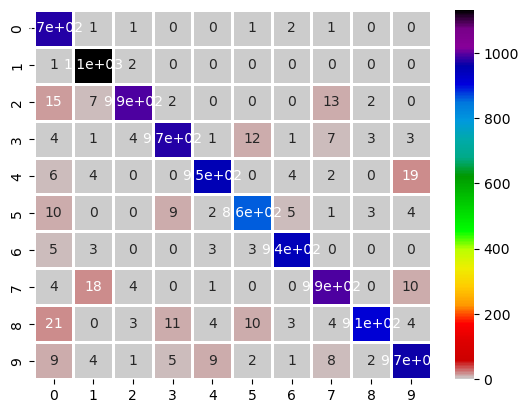

In [17]:
import seaborn as sns
s = sns.heatmap(confusion, annot=True,linewidths=2, cmap='nipy_spectral_r')

# Train the K-Nearest Neighbor Model for k=1

In [18]:
knn_1 = KNeighborsClassifier(n_neighbors=1,p=2,metric='euclidean')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [19]:
y_pred = knn_1.predict(x_test)

C:\Users\nikos\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Evaluation of the Model for k=1

In [20]:
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 samples avg       0.97      0.97      0.97     10000



In [21]:
confusion = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]],
      dtype=int64)

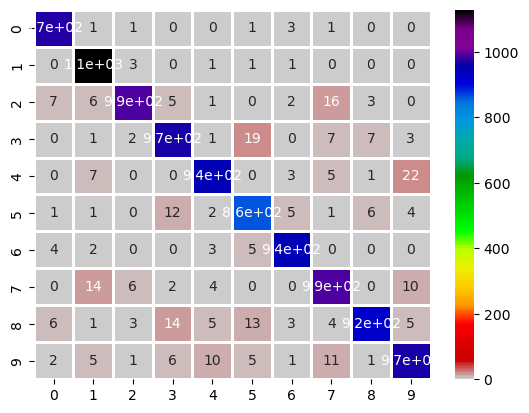

In [22]:
import seaborn as sns
s = sns.heatmap(confusion, annot=True,linewidths=2, cmap='nipy_spectral_r')

# Results
Σύμφωνα με τις μετρήσεις ο κατηγοριοποιητής πλησιέστερου κέντρου είχε 82% σωστά αποτελέσματα, ενώ ο κατηγοριοποιητής πλησιέστερου γείτονα με 1 και 3 πλησιέστερους γείτονες, είχαν και οι δύο 97% αποτέλεσμα με ελάχιστες διαφορές στα αποτελέσματα.